In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
folder_dir = '../data/'
date_range = ["2012","2013","2014","2015","2016","2017"]

In [3]:
for i in range(len(date_range)):
    year = date_range[i]
    data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
    year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
    
    if i == 0:
        data = year_data
    else:
        data = pd.concat([data,year_data])

data.head()

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,break_length,y,x0,on_1b,on_2b,on_3b,umpcall,outcome,offense_score,defense_score
0,2012-04-04,Marlins Park,1,top,johnsjo09,5,beltrca01,0,0,30.626,...,3.4,154.56,-1.902,NaN,NaN,NaN,X,Single,0,0
1,2012-04-04,Marlins Park,1,top,johnsjo09,6,hollima01,0,0,28.580,...,3.8,132.11,-2.052,beltrca01,NaN,NaN,S,NaN,0,0
2,2012-04-04,Marlins Park,1,top,johnsjo09,7,hollima01,0,1,31.294,...,3.7,125.20,-2.130,beltrca01,NaN,NaN,S,NaN,0,0
3,2012-04-04,Marlins Park,1,top,johnsjo09,8,hollima01,0,2,33.548,...,3.6,151.97,-2.100,beltrca01,NaN,NaN,B,NaN,0,0
4,2012-04-04,Marlins Park,1,top,johnsjo09,9,hollima01,1,2,24.925,...,7.1,144.20,-2.312,beltrca01,NaN,NaN,X,Flyout,0,0


In [ ]:
'''
TODO:
    -More exploratory data analysis
    -Feature engineering/Clean data/select features
    -Define target valuable   
    
'''

In [4]:
data = data.drop(['on_1b', 'on_2b', "on_3b",'y'], axis = 1)
data.shape

(3902210, 43)

In [ ]:
_ = plt.hist(data.isnull().sum())

In [ ]:
print(len(data.columns.values))
print(data.columns.values[0])
data.columns.values

In [ ]:
data.isnull().sum()

In [ ]:
data.dtypes

### Finding feature types

In [ ]:
g = data.columns.to_series().groupby(data.dtypes).groups
dtype_groups = {k.name: v for k, v in g.items()}
dtype_groups

In [ ]:
dtype_groups["int64"].values

In [ ]:
dtype_groups["float64"].values

In [ ]:
dtype_groups["object"].values

### Analyze the index

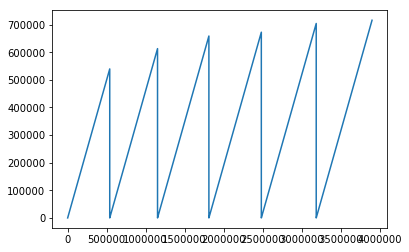

In [10]:
_ = plt.plot(data.index)

### Converting "date" feature to datetime

In [12]:
data["date"]

dtype('O')

In [13]:
data["date"][0:5]

0    2012-04-04
1    2012-04-04
2    2012-04-04
3    2012-04-04
4    2012-04-04
Name: date, dtype: object

In [18]:
pd.to_datetime(data["date"][0:5])

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

In [19]:
data["date"] = pd.to_datetime(data["date"])

In [20]:
data["date"][0:5]

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

### sorting by pitcher, date and pitch_count in that order and reindex

In [22]:
data = data.sort_values(by = ["pitcher","date", "pitch_count"])
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
516886,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
516887,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
516888,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
516889,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
516890,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
516891,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
516892,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
516893,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
516894,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
516895,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


In [25]:
data = data.reset_index_index(drop = True)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


### Plotting features

In [ ]:
#Plotting all Int64 typed features
for i in range(len(dtype_groups["int64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["int64"].values[i])
    plt.hist(data[dtype_groups["int64"].values[i]],
             rwidth = 0.5)

In [ ]:
#Plotting all Float64 typed features
for i in range(len(dtype_groups["float64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["float64"].values[i])
    plt.hist(data[dtype_groups["float64"].values[i]].dropna(),
             rwidth = 0.5)

In [ ]:
_ = data[dtype_groups["object"][0]].value_counts().plot(kind="bar",
                                                    figsize=(20,10),
                                                    title = "Dates")

In [ ]:
#Plotting all Object typed features
for i in range(len(dtype_groups["object"].values)):
    print(dtype_groups["object"][i])
    _ = data[dtype_groups["object"][i]].value_counts().plot(kind="bar",
                                                       figsize=(20,10),
                                                       title = dtype_groups["object"][i])

In [ ]:
plt.hist(data['zone'])

In [ ]:
plt.hist(data['spin_dir'])

### Rolling_mean feature

In [26]:
#data = data.sample(n = 1000)
data.shape

(3902210, 43)

In [36]:
data.loc[data['pitch_type'] == "FF"]["start_speed"][0:5]

0    91.4
1    92.0
3    92.3
5    91.8
6    91.9
Name: start_speed, dtype: float64

In [37]:
roll_means = data.loc[data['pitch_type'] == "FF"].groupby('pitcher')['start_speed'].rolling(5).mean()
roll_means

pitcher           
aardsda01  0            NaN
           1            NaN
           3            NaN
           5            NaN
           6          91.88
           9          91.82
           10         91.68
           11         91.34
           15         91.22
           16         91.10
           19         91.10
           20         91.18
           23         91.52
           24         91.36
           26         91.36
           28         91.50
           29         91.58
           30         91.62
           31         92.02
           32         92.26
           34         92.46
           37         92.20
           41         91.98
           42         92.04
           43         92.04
           46         91.82
           49         92.02
           52         91.90
           55         92.02
           56         91.72
                      ...  
zychto01   3901841    93.86
           3901842    93.76
           3901846    93.50
           3901848    93.48
 

check where the NaNs are to see if rolling averages use data from previous pitchers

In [42]:
roll_means.values

array([   nan,    nan,    nan, ...,  92.18,  92.48,  92.04])

In [46]:
pd.DataFrame(np.argwhere(np.isnan(roll_means.values)))

,0
0,0
1,1
2,2
3,3
4,764
5,765
6,766
7,767
8,2051
9,2052


It seems like rolling mean is not using values from previous pitchers.

In [33]:
type(roll_means)

pandas.core.series.Series

In [35]:
pd.concat([data,roll_means])

/Users/atakanokan/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,0
0,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,1.0,lindad01,0.0,0.0,30.056,...,116.74,2317.690,50.0,3.1,-2.016,S,NaN,5.0,5.0,NaN
1,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,2.0,lindad01,0.0,1.0,32.022,...,124.46,2354.990,50.0,3.8,-2.068,S,NaN,5.0,5.0,NaN
2,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,3.0,lindad01,0.0,2.0,28.049,...,121.03,1636.480,50.0,6.3,-1.969,S,NaN,5.0,5.0,NaN
3,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,4.0,lindad01,0.0,2.0,30.499,...,184.55,2380.220,50.0,3.8,-2.441,B,NaN,5.0,5.0,NaN
4,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,5.0,lindad01,1.0,2.0,25.168,...,132.19,1034.360,50.0,7.0,-2.352,S,NaN,5.0,5.0,NaN
5,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,6.0,lindad01,1.0,2.0,30.384,...,140.77,2491.110,50.0,4.2,-1.982,X,Groundout,5.0,5.0,NaN
6,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,7.0,arencjp01,0.0,0.0,30.162,...,138.20,2269.490,50.0,3.4,-2.100,X,Home Run,5.0,5.0,NaN
7,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,8.0,johnske05,0.0,0.0,24.864,...,99.57,2030.960,50.0,7.2,-1.866,S,NaN,6.0,6.0,NaN
8,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,9.0,johnske05,0.0,1.0,24.214,...,151.93,1380.710,50.0,7.1,-2.222,B,NaN,6.0,6.0,NaN
9,2012-09-27,Rogers Centre,8.0,bottom,aardsda01,10.0,johnske05,1.0,1.0,29.432,...,151.07,2230.470,50.0,3.2,-2.051,B,NaN,6.0,6.0,NaN


## 1. Target variable
We classify a pitch as good if it induces a swinging strike, a called strike, a foul, or if it generates a
ball in play that is converted to an out

In [ ]:
data.outcome.unique()

In [ ]:
data.umpcall.unique()

In [ ]:
data.descr.unique()

In [ ]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice','Fielders Choice Out', 
             'Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

In [ ]:
#Create target feature
data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

In [ ]:
data.y.unique(), data.y.isnull().any()

In [ ]:
data.columns

## 2. Divide in Train (2012-2106) and Test (2017)

In [ ]:
#Drop columns we´re not going to use
data['year']=data['date'].str.slice(0,4)

features=['umpcall', 'outcome','start_speed','pfx_x','pfx_z','px','pz','break_y','break_angle','break_length','pitch_type',
         'spin_dir','nasty','pitch_count','descr','y','year','zone','strikes','balls','pitcher','pitch_type']
baseline_features=['start_speed','px','pz','year','y']

data=data[features]
data_base=data[baseline_features]

In [ ]:
#data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
#year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
save_path=folder_dir+'data_clean.csv'
data.to_csv(save_path) 

In [ ]:
#data = data.drop(['on_1b', 'on_2b', "on_3b"], axis = 1)
X_train=data_base[data_base['year']!='2017']
y_train=X_train['y']
X_train=X_train.drop(['y','year'],axis=1)

X_test=data_base[data_base['year']=='2017']
y_test=X_test['y']
X_test=X_test.drop(['y','year'],axis=1)

X_train.head()

In [ ]:
X_train.shape

## 3. Baseline with Logistic Regression

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(X_train)
poly.fit_transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

In [ ]:
#print(list(zip(list(X_train.columns),list(baseline.coef_[0]))))
baseline.coef_

In [ ]:
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))